In [282]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [232]:
colum=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [260]:
train=pd.read_csv("/content/drive/MyDrive/Copy of trainKNN.txt",sep=",",header=None, names=colum,index_col="Id_number")
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id_number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7


In [261]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [262]:
train["Type of glass"].unique()

array([1, 2, 3, 5, 6, 7])

In [263]:
x=train.drop("Type of glass",axis=1)
y=train["Type of glass"]

In [264]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
#st=MinMaxScaler()
x=st.fit_transform(x)

In [266]:
# FIND BEST RANDOM STATE
for i in range(50,120):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)#11
  knn=KNeighborsClassifier(n_neighbors=6)
  knn.fit(x_train,y_train)
  print(i)
  print(knn.score(x_test,y_test))


50
0.6530612244897959
51
0.673469387755102
52
0.7346938775510204
53
0.6122448979591837
54
0.7142857142857143
55
0.5102040816326531
56
0.7142857142857143
57
0.673469387755102
58
0.6530612244897959
59
0.5306122448979592
60
0.6122448979591837
61
0.6326530612244898
62
0.7755102040816326
63
0.6326530612244898
64
0.7346938775510204
65
0.7346938775510204
66
0.6122448979591837
67
0.6938775510204082
68
0.6938775510204082
69
0.6122448979591837
70
0.6326530612244898
71
0.6122448979591837
72
0.7551020408163265
73
0.6530612244897959
74
0.6326530612244898
75
0.6326530612244898
76
0.7755102040816326
77
0.6326530612244898
78
0.6122448979591837
79
0.5714285714285714
80
0.5714285714285714
81
0.6530612244897959
82
0.7755102040816326
83
0.6122448979591837
84
0.7551020408163265
85
0.6326530612244898
86
0.7551020408163265
87
0.6938775510204082
88
0.6326530612244898
89
0.7142857142857143
90
0.6326530612244898
91
0.6530612244897959
92
0.673469387755102
93
0.5714285714285714
94
0.673469387755102
95
0.775510204

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=86)
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7551020408163265

#manhattan_distance(P1)

In [269]:
knn=KNeighborsClassifier(n_neighbors=6,p=1)

In [270]:
param={
    'weights':('uniform', 'distance'),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
    "leaf_size":[25,26,27,28,29,30,35,38,40,42,45,50,55,56,68,70]
}

In [271]:
clf=GridSearchCV(knn,param,cv=30)

In [272]:
clf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=30.
  UserWarning,


GridSearchCV(cv=30, estimator=KNeighborsClassifier(n_neighbors=6, p=1),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [25, 26, 27, 28, 29, 30, 35, 38, 40, 42,
                                       45, 50, 55, 56, 68, 70],
                         'weights': ('uniform', 'distance')})

In [273]:
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'weights': 'distance'}

In [274]:
clf.best_score_

0.7333333333333333

In [278]:
knn=KNeighborsClassifier(n_neighbors=6,p=1,algorithm='auto', leaf_size= 25, weights='distance')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8367346938775511

In [279]:
y_pred=knn.predict(x_test)
y_pred

array([2, 2, 1, 2, 7, 2, 1, 7, 6, 1, 1, 2, 2, 7, 7, 1, 1, 7, 6, 1, 1, 1,
       2, 7, 2, 2, 1, 1, 1, 2, 2, 1, 7, 1, 1, 2, 2, 5, 1, 7, 2, 2, 7, 1,
       7, 2, 2, 1, 5])

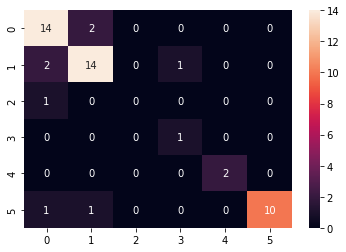

In [283]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
sn.heatmap(cn,annot=True)

#euclidean_distance(P2)

In [284]:
knn=KNeighborsClassifier(n_neighbors=6,p=2)

In [285]:
clf=GridSearchCV(knn,param,cv=30)
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=30.
  UserWarning,


GridSearchCV(cv=30, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [25, 26, 27, 28, 29, 30, 35, 38, 40, 42,
                                       45, 50, 55, 56, 68, 70],
                         'weights': ('uniform', 'distance')})

In [286]:
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'weights': 'distance'}

In [287]:
clf.best_score_

0.6800000000000002

In [288]:
knn=KNeighborsClassifier(n_neighbors=6,p=2,algorithm='auto', leaf_size= 25, weights='distance')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7755102040816326

In [289]:
y_pred=knn.predict(x_test)
y_pred

array([2, 2, 2, 2, 7, 2, 1, 7, 6, 1, 1, 2, 2, 7, 7, 1, 2, 7, 6, 1, 1, 1,
       2, 7, 2, 2, 1, 1, 1, 2, 2, 2, 7, 1, 1, 2, 2, 5, 1, 7, 2, 2, 7, 1,
       7, 2, 2, 1, 2])

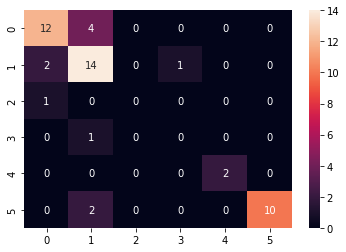

In [290]:
cn=confusion_matrix(y_test,y_pred)
sn.heatmap(cn,annot=True)